# **Weather History**

## Importing Libraries







In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout

## Reading DataFrame

In [94]:
df=pd.read_csv('/content/weatherHistory.csv',parse_dates=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [96]:
#converting date column into datetime format
df['Formatted Date']=pd.to_datetime(df['Formatted Date'])

In [97]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [98]:
# plt.figure(figsize=(20,6))
# sns.lineplot(data=df,x='Formatted Date',y='Temperature (C)')

## Percentage of Missing Values

In [99]:
100*df.isnull().sum()/len(df)

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [100]:
df.dropna(inplace=True)

In [101]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

## Feature Selection

In [102]:
df.drop(['Formatted Date','Summary','Daily Summary','Loud Cover'],axis=1,inplace=True)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


## Target Feature Countplot

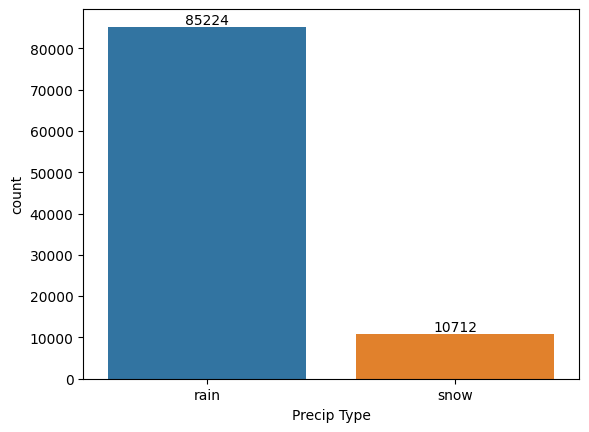

In [103]:
ax=sns.countplot(x='Precip Type',data=df)
for container in ax.containers:
        ax.bar_label(container)

In [104]:
df['Precip Type']=df['Precip Type'].map({'rain':0,'snow':1})

In [105]:
df['Precip Type'].value_counts()

0    85224
1    10712
Name: Precip Type, dtype: int64

## Correalation

<Axes: >

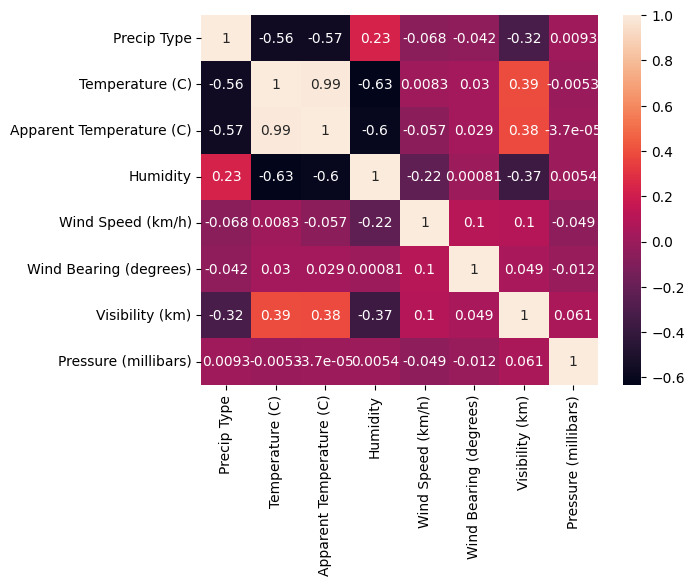

In [106]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

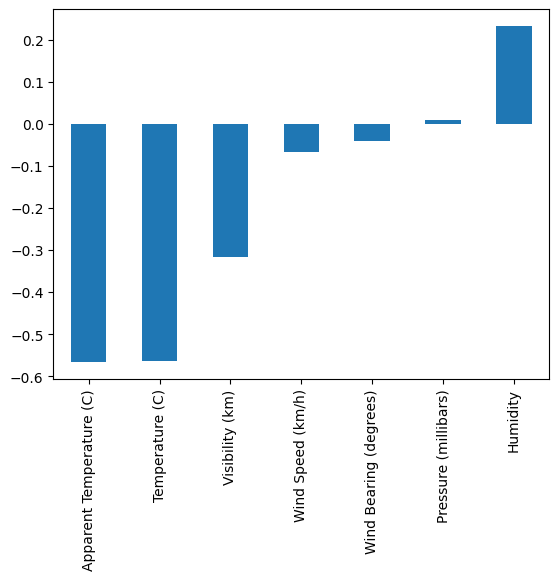

In [107]:
df.corr()['Precip Type'][1:].sort_values().plot(kind='bar')

## Seaperating Independant and Dependant variable

In [108]:
x=df.drop('Precip Type',axis=1).values
y=df['Precip Type'].values

## Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#x=sc.fit_transform(x)
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Spliting Dataset into Training and testing dataset

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [111]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [112]:
model.fit(x=x_train, y=y_train, epochs=10,validation_split=0.20)

Epoch 1/10
1799/1799 [==============================] - 6s 3ms/step - loss: 9.6485 - accuracy: 0.8466 - val_loss: 0.3802 - val_accuracy: 0.8878
Epoch 2/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.4314 - accuracy: 0.8867 - val_loss: 0.3518 - val_accuracy: 0.8878
Epoch 3/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.3709 - accuracy: 0.8874 - val_loss: 0.3508 - val_accuracy: 0.8878
Epoch 4/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.3576 - accuracy: 0.8879 - val_loss: 0.3508 - val_accuracy: 0.8878
Epoch 5/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.3523 - accuracy: 0.8884 - val_loss: 0.3504 - val_accuracy: 0.8878
Epoch 6/10
1799/1799 [==============================] - 4s 2ms/step - loss: 0.3502 - accuracy: 0.8886 - val_loss: 0.3501 - val_accuracy: 0.8881
Epoch 7/10
1799/1799 [==============================] - 5s 3ms/step - loss: 0.3494 - accuracy: 0.8887 - val_loss: 0.3500 - val_accuracy:

In [113]:
df_loss=pd.DataFrame(model.history.history)

In [114]:
df_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,9.648497,0.846598,0.380229,0.887847
1,0.431357,0.886659,0.351760,0.887847
2,0.370932,0.887354,0.350817,0.887847
3,0.357593,0.887928,0.350759,0.887847
4,0.352304,0.888379,0.350448,0.887847


<Axes: >

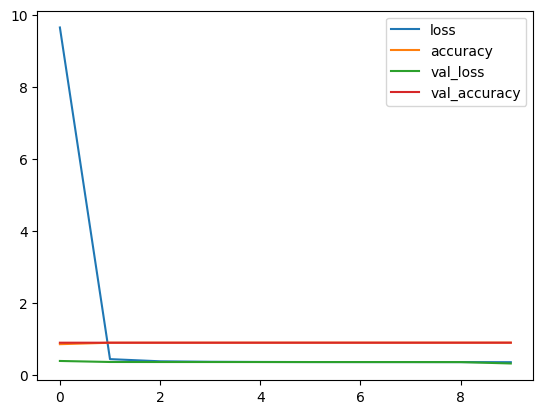

In [115]:
df_loss.plot()

In [116]:
ypred=model.predict(x_test)
ypred[:5]

750/750 [==============================] - 1s 1ms/step


array([[0.06897467],
       [0.05574806],
       [0.11547198],
       [0.09866229],
       [0.04226653]], dtype=float32)

In [117]:
ypred=np.where(ypred>0.5,1,0)
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Model Evaluation

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21306
           1       1.00      0.00      0.01      2678

    accuracy                           0.89     23984
   macro avg       0.94      0.50      0.48     23984
weighted avg       0.90      0.89      0.84     23984



In [120]:
confusion_matrix(y_test,ypred)

array([[21306,     0],
       [ 2665,    13]])

<Axes: >

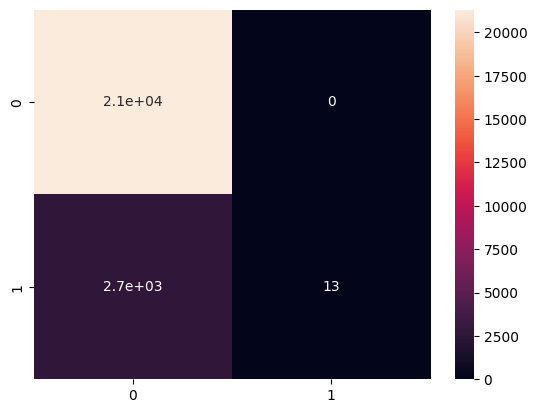

In [121]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)

## Prediction Unseen feature

In [122]:
a=[[9.5,7.3,0.7,13,200,14,1000]]
model.predict(sc.transform(a))

1/1 [==============================] - 0s 20ms/step


array([[0.09303749]], dtype=float32)